In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# 日本語フォントの指定
mpl.rcParams['font.family'] = 'IPAexGothic' # ここにインストールしたフォント名を入れる

from sklearn.model_selection import KFold
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import StratifiedKFold
from nyaggle.feature.category_encoder import TargetEncoder

from nyaggle.experiment import run_experiment

In [3]:
train_ver1 = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/train_feature_ver1.csv')
test_ver1 = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/test_feature_ver1.csv')

train_ver2 = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/train_feature_ver2.csv')
test_ver2 = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/test_feature_ver2.csv')

era = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/era.csv')
sample_submission = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/sample_submission.csv')

In [4]:
train = pd.concat([train_ver1, train_ver2.iloc[:, 17:]], axis=1)
test = pd.concat([test_ver1, test_ver2.iloc[:, 16:]], axis=1)

In [5]:
#categorical変数抽出
cat_cols = [c for c in test.columns if train[c].dtype == np.object]
#cat_cols.remove('string') # これは取り除かないといけない

# numerical変数抽出
num_cols = [c for c in test.columns if train[c].dtype != np.object]

#目的変数抽出
target_col = 'is_kokuhou'

print(cat_cols)
print(num_cols)
print(target_col)

['棟名', '種別2', '国', '時代', '都道府県 ※美工品は「所有者住所（所在都道府県）」', '所在地', '保管施設の名称', '所有者名', '管理団体又は責任者']
['緯度', '経度', '開始', '終了', '緯度*経度', '終了-開始', 'label_棟名', 'label_種別2', 'label_国', 'label_時代', 'label_都道府県 ※美工品は「所有者住所（所在都道府県）」', 'label_所在地', 'label_保管施設の名称', 'label_所有者名', 'label_管理団体又は責任者', 'count_棟名', 'count_種別2', 'count_国', 'count_時代', 'count_都道府県 ※美工品は「所有者住所（所在都道府県）」', 'count_所在地', 'count_保管施設の名称', 'count_所有者名', 'count_管理団体又は責任者', '棟名_緯度_min', '棟名_緯度_max', '棟名_緯度_mean', '棟名_緯度_std', '棟名_経度_min', '棟名_経度_max', '棟名_経度_mean', '棟名_経度_std', '棟名_開始_min', '棟名_開始_max', '棟名_開始_mean', '棟名_開始_std', '棟名_終了_min', '棟名_終了_max', '棟名_終了_mean', '棟名_終了_std', '棟名_緯度*経度_min', '棟名_緯度*経度_max', '棟名_緯度*経度_mean', '棟名_緯度*経度_std', '棟名_終了-開始_min', '棟名_終了-開始_max', '棟名_終了-開始_mean', '棟名_終了-開始_std', '種別2_緯度_min', '種別2_緯度_max', '種別2_緯度_mean', '種別2_緯度_std', '種別2_経度_min', '種別2_経度_max', '種別2_経度_mean', '種別2_経度_std', '種別2_開始_min', '種別2_開始_max', '種別2_開始_mean', '種別2_開始_std', '種別2_終了_min', '種別2_終了_max', '種別2_終了_mean', '種別2_終了_std', '種

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [6]:
# target encoding

# kf = KFold(4)
# kf = KFold(4, groups=train.categorical)　#GroupKFold
kf = StratifiedKFold(5, shuffle=True, random_state=42531) #StratifiedKFold

# Target encoding with K-fold
# te = TargetEncoder(kf.split(train))
# te = TargetEncoder(kf.split(train)) #GroupKFold
te = TargetEncoder(kf.split(train, train[target_col])) #StratifiedKFold

# use fit/fit_transform to train data, then apply transform to test data
train.loc[:, cat_cols] = te.fit_transform(train[cat_cols], train[target_col])
test.loc[:, cat_cols] = te.transform(test[cat_cols])

In [7]:
print(len(cat_cols) + len(num_cols))

760


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[1]	valid_0's binary_logloss: 0.259296
[2]	valid_0's binary_logloss: 0.255975
[3]	valid_0's binary_logloss: 0.253076
[4]	valid_0's binary_logloss: 0.250717
[5]	valid_0's binary_logloss: 0.248844
[6]	valid_0's binary_logloss: 0.247017
[7]	valid_0's binary_logloss: 0.246519
[8]	valid_0's binary_logloss: 0.245276


/opt/conda/lib/python3.7/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[9]	valid_0's binary_logloss: 0.273209
[10]	valid_0's binary_logloss: 0.270533
[11]	valid_0's binary_logloss: 0.267628
[12]	valid_0's binary_logloss: 0.267628
[13]	valid_0's binary_logloss: 0.267748
[14]	valid_0's binary_logloss: 0.264898
[15]	valid_0's binary_logloss: 0.262232
[16]	valid_0's binary_logloss: 0.259734
[17]	valid_0's binary_logloss: 0.257811
[18]	valid_0's binary_logloss: 0.255596
[19]	valid_0's binary_logloss: 0.298936
[20]	valid_0's binary_logloss: 0.294026
[21]	valid_0's binary_logloss: 0.294945
[22]	valid_0's binary_logloss: 0.289949
[23]	valid_0's binary_logloss: 0.285357
[24]	valid_0's binary_logloss: 0.285196
[25]	valid_0's binary_logloss: 0.28094
[26]	valid_0's binary_logloss: 0.277437
[27]	valid_0's binary_logloss: 0.273812
[28]	valid_0's binary_logloss: 0.270148
[29]	valid_0's binary_logloss: 0.267143
[30]	valid_0's binary_logloss: 0.264078
[31]	valid_0's binary_logloss: 0.261156
[32]	valid_0's binary_logloss: 0.260166
[33]	valid_0's binary_logloss: 0.261018
[3

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[1]	valid_0's binary_logloss: 0.259477
[2]	valid_0's binary_logloss: 0.255951
[3]	valid_0's binary_logloss: 0.251897
[4]	valid_0's binary_logloss: 0.249026
[5]	valid_0's binary_logloss: 0.246278
[6]	valid_0's binary_logloss: 0.244507
[7]	valid_0's binary_logloss: 0.244777
[8]	valid_0's binary_logloss: 0.242741
[9]	valid_0's binary_logloss: 0.273295


/opt/conda/lib/python3.7/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[10]	valid_0's binary_logloss: 0.270145
[11]	valid_0's binary_logloss: 0.267005
[12]	valid_0's binary_logloss: 0.267005
[13]	valid_0's binary_logloss: 0.267233
[14]	valid_0's binary_logloss: 0.264974
[15]	valid_0's binary_logloss: 0.262391
[16]	valid_0's binary_logloss: 0.259674
[17]	valid_0's binary_logloss: 0.257125
[18]	valid_0's binary_logloss: 0.255114
[19]	valid_0's binary_logloss: 0.301665
[20]	valid_0's binary_logloss: 0.296916
[21]	valid_0's binary_logloss: 0.297934
[22]	valid_0's binary_logloss: 0.293299
[23]	valid_0's binary_logloss: 0.289066
[24]	valid_0's binary_logloss: 0.288557
[25]	valid_0's binary_logloss: 0.284537
[26]	valid_0's binary_logloss: 0.280458
[27]	valid_0's binary_logloss: 0.276733
[28]	valid_0's binary_logloss: 0.273205
[29]	valid_0's binary_logloss: 0.270087
[30]	valid_0's binary_logloss: 0.267092
[31]	valid_0's binary_logloss: 0.264466
[32]	valid_0's binary_logloss: 0.263384
[33]	valid_0's binary_logloss: 0.264298
[34]	valid_0's binary_logloss: 0.264109


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[1]	valid_0's binary_logloss: 0.259138
[2]	valid_0's binary_logloss: 0.253862
[3]	valid_0's binary_logloss: 0.2492
[4]	valid_0's binary_logloss: 0.245896
[5]	valid_0's binary_logloss: 0.242315
[6]	valid_0's binary_logloss: 0.239222
[7]	valid_0's binary_logloss: 0.239446
[8]	valid_0's binary_logloss: 0.236605


/opt/conda/lib/python3.7/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[9]	valid_0's binary_logloss: 0.267867
[10]	valid_0's binary_logloss: 0.264161
[11]	valid_0's binary_logloss: 0.260502
[12]	valid_0's binary_logloss: 0.260502
[13]	valid_0's binary_logloss: 0.261075
[14]	valid_0's binary_logloss: 0.257547
[15]	valid_0's binary_logloss: 0.254404
[16]	valid_0's binary_logloss: 0.251515
[17]	valid_0's binary_logloss: 0.248342
[18]	valid_0's binary_logloss: 0.245673
[19]	valid_0's binary_logloss: 0.292892
[20]	valid_0's binary_logloss: 0.287156
[21]	valid_0's binary_logloss: 0.288394
[22]	valid_0's binary_logloss: 0.282708
[23]	valid_0's binary_logloss: 0.277663
[24]	valid_0's binary_logloss: 0.277371
[25]	valid_0's binary_logloss: 0.27281
[26]	valid_0's binary_logloss: 0.26831
[27]	valid_0's binary_logloss: 0.264017
[28]	valid_0's binary_logloss: 0.260426
[29]	valid_0's binary_logloss: 0.256901
[30]	valid_0's binary_logloss: 0.253395
[31]	valid_0's binary_logloss: 0.250237
[32]	valid_0's binary_logloss: 0.249076
[33]	valid_0's binary_logloss: 0.250347
[34

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[1]	valid_0's binary_logloss: 0.261852
[2]	valid_0's binary_logloss: 0.256866
[3]	valid_0's binary_logloss: 0.252577
[4]	valid_0's binary_logloss: 0.249516
[5]	valid_0's binary_logloss: 0.246849
[6]	valid_0's binary_logloss: 0.244189
[7]	valid_0's binary_logloss: 0.244431
[8]	valid_0's binary_logloss: 0.242343
[9]	valid_0's binary_logloss: 0.273143
[10]	valid_0's binary_logloss: 0.270135
[11]	valid_0's binary_logloss: 0.267158


/opt/conda/lib/python3.7/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[12]	valid_0's binary_logloss: 0.267158
[13]	valid_0's binary_logloss: 0.267414
[14]	valid_0's binary_logloss: 0.263962
[15]	valid_0's binary_logloss: 0.261404
[16]	valid_0's binary_logloss: 0.258636
[17]	valid_0's binary_logloss: 0.256449
[18]	valid_0's binary_logloss: 0.253798
[19]	valid_0's binary_logloss: 0.302642
[20]	valid_0's binary_logloss: 0.297533
[21]	valid_0's binary_logloss: 0.29841
[22]	valid_0's binary_logloss: 0.292838
[23]	valid_0's binary_logloss: 0.287847
[24]	valid_0's binary_logloss: 0.286759
[25]	valid_0's binary_logloss: 0.281855
[26]	valid_0's binary_logloss: 0.277267
[27]	valid_0's binary_logloss: 0.27316
[28]	valid_0's binary_logloss: 0.270781
[29]	valid_0's binary_logloss: 0.267521
[30]	valid_0's binary_logloss: 0.264115
[31]	valid_0's binary_logloss: 0.260902
[32]	valid_0's binary_logloss: 0.259783
[33]	valid_0's binary_logloss: 0.261092
[34]	valid_0's binary_logloss: 0.260655
[35]	valid_0's binary_logloss: 0.261686
[36]	valid_0's binary_logloss: 0.258726
[3

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[1]	valid_0's binary_logloss: 0.260453
[2]	valid_0's binary_logloss: 0.255429
[3]	valid_0's binary_logloss: 0.250328
[4]	valid_0's binary_logloss: 0.247365
[5]	valid_0's binary_logloss: 0.243974
[6]	valid_0's binary_logloss: 0.240649
[7]	valid_0's binary_logloss: 0.240618
[8]	valid_0's binary_logloss: 0.237913
[9]	valid_0's binary_logloss: 0.268093
[10]	valid_0's binary_logloss: 0.264253
[11]	valid_0's binary_logloss: 0.260544
[12]	valid_0's binary_logloss: 0.260544
[13]	valid_0's binary_logloss: 0.26145


/opt/conda/lib/python3.7/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[14]	valid_0's binary_logloss: 0.258251
[15]	valid_0's binary_logloss: 0.255536
[16]	valid_0's binary_logloss: 0.252621
[17]	valid_0's binary_logloss: 0.250082
[18]	valid_0's binary_logloss: 0.247454
[19]	valid_0's binary_logloss: 0.294372
[20]	valid_0's binary_logloss: 0.288461
[21]	valid_0's binary_logloss: 0.289398
[22]	valid_0's binary_logloss: 0.283696
[23]	valid_0's binary_logloss: 0.278645
[24]	valid_0's binary_logloss: 0.278334
[25]	valid_0's binary_logloss: 0.273566
[26]	valid_0's binary_logloss: 0.268985
[27]	valid_0's binary_logloss: 0.265028
[28]	valid_0's binary_logloss: 0.260862
[29]	valid_0's binary_logloss: 0.257435
[30]	valid_0's binary_logloss: 0.254088
[31]	valid_0's binary_logloss: 0.250922
[32]	valid_0's binary_logloss: 0.249788
[33]	valid_0's binary_logloss: 0.251168
[34]	valid_0's binary_logloss: 0.250715
[35]	valid_0's binary_logloss: 0.251799
[36]	valid_0's binary_logloss: 0.248273
[37]	valid_0's binary_logloss: 0.247761
[38]	valid_0's binary_logloss: 0.244883


/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 20195 (\N{CJK UNIFIED IDEOGRAPH-4EE3}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 25152 (\N{CJK UNIFIED IDEOGRAPH-6240}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 32773 (\N{CJK UNIFIED IDEOGRAPH-8005}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 2

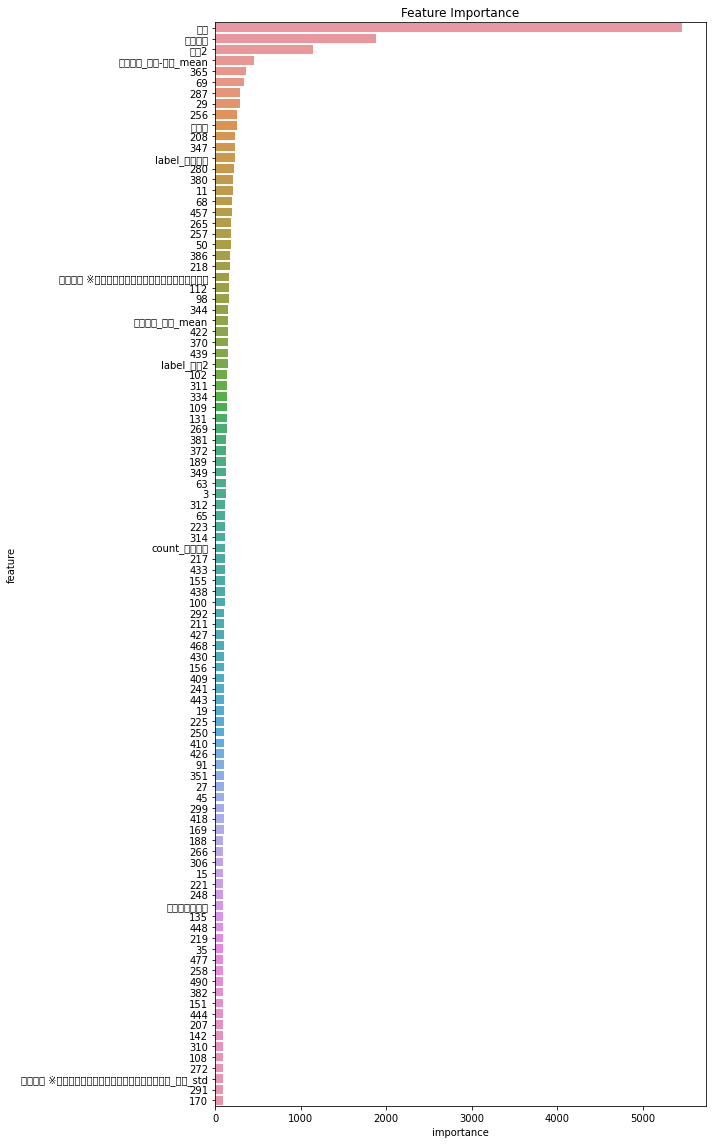

In [8]:
params = {
    'boosting': "dart", # dart, gbdt, goss, rf
    'objective': "binary", # binary, multiclass, regression
    'metric': "binary_logloss", # mae, mse, auc, binary_logloss, multi_logloss, rmse, average_precision
    'learning_rate':0.05, #0.05
    'n_estimators': 210,
    'max_depth': -1,
    'random_state' : 42531
    #'num_leaves' : 100, #カーディナリティが高い場合は大きくする
    #'max_bin' : 500,
}

result = run_experiment(params,
                        train[num_cols + cat_cols],
                        train[target_col],
                        test[num_cols + cat_cols],
                        cv=StratifiedKFold(5, shuffle=True, random_state=42531), #cv=5,
                        #groups=train.group
                        )

In [18]:
print(result.metrics) # Evalulation metrics for each fold

[0.7908172302737521, 0.7850322061191626, 0.8267069243156199, 0.8143357487922706, 0.8313959518433713, 0.8081273433162665]


In [10]:
print(result.metrics) # Evalulation metrics for each fold

[0.7830434782608695, 0.7822745571658616, 0.8266908212560387, 0.8261433172302737, 0.8351138095276086, 0.8096638097616974]


In [9]:
print(result.metrics) # Evalulation metrics for each fold

[0.7725885668276973, 0.7818236714975845, 0.8162882447665056, 0.817194041867955, 0.8370046513112228, 0.8053098184368901]


In [28]:
IM = result.importance     # Feature importance for each fold

In [32]:
IM[2].sort_values('importance', ascending=False).head(20)

,feature,importance
754,時代,5533.974880
758,所有者名,1655.755015
752,種別2,1583.162767
756,所在地,429.101809
13,label_所有者名,352.651622
504,265,349.998780
289,50,324.430539
337,98,316.240280
496,257,291.254490
250,11,283.377229


In [9]:
print(result.test_prediction)  # Test prediction in numpy array
print(result.oof_prediction)   # Out-of-fold prediction in numpy array

[0.01686719 0.26354591 0.38695678 ... 0.11004132 0.02079375 0.01656444]
[0.01023762 0.10690403 0.44758661 ... 0.10618172 0.21969019 0.02287255]


In [10]:
train[target_col].to_numpy()

array([0, 0, 1, ..., 0, 0, 0])

In [11]:
# データ全体のF1スコアを計算 & 閾値の最適化
from sklearn.metrics import f1_score

def find_optimal_threshold(y_true, y_scores):
    thresholds = np.linspace(0, 1, 100)
    best_threshold = 0
    best_score = 0

    for threshold in thresholds:
        y_pred = (y_scores > threshold).astype(int)
        score = f1_score(y_true, y_pred)

        if score > best_score:
            best_score = score
            best_threshold = threshold

    return best_threshold, best_score

# 例として使用するデータ（実際にはモデルからの予測値と実際のラベルを使用）
y_true = train[target_col].values
y_scores = result.oof_prediction

best_threshold, best_f1_score = find_optimal_threshold(y_true, y_scores)
print(f"Best threshold: {best_threshold}")
print(f"Best F1 Score: {best_f1_score}")

Best threshold: 0.21212121212121213
Best F1 Score: 0.36044362292051757


In [12]:
# 閾値を超える確率を持つ要素を1に、それ以外を0に変換
y_pred = (result.test_prediction > best_threshold).astype(int)
print(y_pred)
print(y_pred.shape)

[0 1 1 ... 0 0 0]
(10065,)


In [13]:
sample_submission['is_kokuhou'] = y_pred
sample_submission

,is_kokuhou
0,0
1,1
2,1
3,0
4,0
...,...
10060,0
10061,0
10062,0
10063,0


In [14]:
sample_submission["is_kokuhou"].value_counts()

0    9148
1     917
Name: is_kokuhou, dtype: int64

In [26]:
sample_submission.to_csv('lightgbm_ver5.csv', index=False)

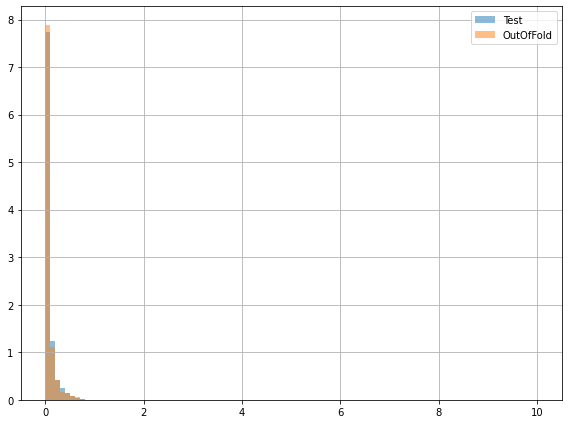

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))

vmax = .02
bins = np.linspace(0, 10, 100)
ax.hist(result.test_prediction, bins=bins, density=True, alpha=.5, label="Test")
ax.hist(result.oof_prediction, bins=bins, density=True, alpha=.5, label="OutOfFold")
ax.grid()
ax.legend()
# ax.set_title("テストと学習時の予測傾向差分")

fig.tight_layout()

In [16]:
print(result.test_prediction)
print(result.oof_prediction)

[0.01686719 0.26354591 0.38695678 ... 0.11004132 0.02079375 0.01656444]
[0.01023762 0.10690403 0.44758661 ... 0.10618172 0.21969019 0.02287255]


In [17]:
df_oof = pd.DataFrame({'lgb_ver5_oof':result.oof_prediction})
df_test = pd.DataFrame({'lgb_ver5_test' : result.test_prediction})

In [18]:
print(df_oof.shape)
print(df_test.shape)

(6710, 1)
(10065, 1)


In [19]:
df_oof.to_csv('lgb_ver5_oof.csv', index=False)
df_test.to_csv('lgb_ver5_test.csv', index=False)